# Use Segnet for segmentation instead of Unet

In [1]:
from utils.utils_data import *
from utils.segnet import *
from torchvision.transforms import *
from datetime import datetime
import logging

''' ---- Starter Information ---- '''

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = None

params = {
    "device":device,                    
    'bz': 1, 'shuffle': True, 'num_workers':4,    # 1. For loader
    "epochs": 30, "lr": 1e-4,                    # 2. For learning
    "scale":0.5,    "amp": False,                 # 3. Grad scaling
    "checkpoint": None
}

transforms = {
    'rgb'  : Compose([Resize((512,512)), RandomHorizontalFlip()]),    # [Pad((0,280))
    'label'  : Compose([Resize((512,512))])
}


now = datetime.now().strftime("%d-%H:%M")
epochs = params['epochs']
loader_train = get_loader(SegDataset(split_name='val_tiny', transforms=None, one_hot_label=False), params=params)
model = SegNet(input_nbr=3, label_nbr=82).to(device=device)

# if checkpoint:
#     print(f'Resuming from checkpoint {checkpoint}')
#     model.load_state_dict(torch.load(checkpoint))
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
logging.info(f'Using device {device}')
logging.info(f'Network:\n'
                f'\t{model.input_nbr} input channels\n'
                f'\t{model.label_nbr} output channels (classes)\n')

try:        
    train_model(model, loader_train, params, checkpoint=False)
    fname = f'./exp/segnet/segnet_weight_epochs{epochs}_{now}.pt'
    torch.save(model.state_dict(), fname)
except KeyboardInterrupt:
    fname = f'./exp/segnet/segnet_weight_INTERRUPTED_{now}_.pt'
    torch.save(model.state_dict(), fname)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
There are [23] objects in total
---- Initializing Dataset ---- 
	 Length: 14
	 N_samples: 921600
	 Split: val_tiny
	 Train: True
	 transforms: None


INFO: Using device cuda
INFO: Network:
	3 input channels
	82 output channels (classes)

INFO: Starting training:
        Epochs:          30
        Learning rate:   0.0001
        Training size (num batches):   14
        Batch size:      1
        Checkpoints:     None
        Device:          cuda
    
Epoch 1/30: 100%|██████████| 14/14 [00:04<00:00,  3.21img/s, loss (batch)=4.39]


62.2392201423645


Epoch 2/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=4.19]


59.83624076843262


Epoch 3/30: 100%|██████████| 14/14 [00:03<00:00,  3.94img/s, loss (batch)=3.91]


56.458802938461304


Epoch 4/30: 100%|██████████| 14/14 [00:03<00:00,  3.92img/s, loss (batch)=3.59]


52.13468360900879


Epoch 5/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=3.1] 


46.414635181427


Epoch 6/30: 100%|██████████| 14/14 [00:03<00:00,  3.95img/s, loss (batch)=2.62]


39.75240468978882


Epoch 7/30: 100%|██████████| 14/14 [00:03<00:00,  3.94img/s, loss (batch)=2.18]


33.438411474227905


Epoch 8/30: 100%|██████████| 14/14 [00:03<00:00,  3.94img/s, loss (batch)=1.85]


28.071317553520203


Epoch 9/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=1.59]


23.888898253440857


Epoch 10/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=1.41]


20.87348163127899


Epoch 11/30: 100%|██████████| 14/14 [00:03<00:00,  3.92img/s, loss (batch)=1.27]


18.72276771068573


Epoch 12/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=1.17]


17.12544047832489


Epoch 13/30: 100%|██████████| 14/14 [00:03<00:00,  3.92img/s, loss (batch)=1.1] 


15.844998121261597


Epoch 14/30: 100%|██████████| 14/14 [00:03<00:00,  3.90img/s, loss (batch)=1.02]


14.733106970787048


Epoch 15/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=0.931]


13.71634179353714


Epoch 16/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=0.886]


12.751167833805084


Epoch 17/30: 100%|██████████| 14/14 [00:03<00:00,  3.94img/s, loss (batch)=0.817]


11.797665119171143


Epoch 18/30: 100%|██████████| 14/14 [00:03<00:00,  3.92img/s, loss (batch)=0.75] 


10.84616094827652


Epoch 19/30: 100%|██████████| 14/14 [00:03<00:00,  3.93img/s, loss (batch)=0.669]


9.905174314975739


Epoch 20/30: 100%|██████████| 14/14 [00:03<00:00,  3.92img/s, loss (batch)=0.621]


9.035009205341339


Epoch 21/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=0.568]


8.30161327123642


Epoch 22/30: 100%|██████████| 14/14 [00:03<00:00,  3.89img/s, loss (batch)=0.517]


7.688613474369049


Epoch 23/30: 100%|██████████| 14/14 [00:03<00:00,  3.89img/s, loss (batch)=0.499]


7.177898287773132


Epoch 24/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=0.47] 


6.744158148765564


Epoch 25/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=0.453]


6.379841685295105


Epoch 26/30: 100%|██████████| 14/14 [00:03<00:00,  3.89img/s, loss (batch)=0.426]


6.068100392818451


Epoch 27/30: 100%|██████████| 14/14 [00:03<00:00,  3.91img/s, loss (batch)=0.408]


5.802842408418655


Epoch 28/30: 100%|██████████| 14/14 [00:03<00:00,  3.90img/s, loss (batch)=0.378]


5.5712472796440125


Epoch 29/30: 100%|██████████| 14/14 [00:03<00:00,  3.88img/s, loss (batch)=0.38] 


5.3678882122039795


Epoch 30/30: 100%|██████████| 14/14 [00:03<00:00,  3.90img/s, loss (batch)=0.364]

5.190599411725998


There are [23] objects in total
---- Initializing Dataset ---- 
	 Length: 14
	 N_samples: 921600
	 Split: val_tiny
	 Train: True
	 transforms: None
Shapes: rgb torch.Size([1, 3, 720, 1280]), depth torch.Size([1, 1, 720, 1280]), label torch.Size([1, 82, 720, 1280])


/home/kyle/anaconda3/envs/pointnet2/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


pred: (torch.Size([720, 1280]), 80, tensor([80], dtype=torch.uint8), 81)
label: (torch.Size([720, 1280]), 35, tensor([35], dtype=torch.uint8), 81)
in visualize: label torch.Size([720, 1280])
[['35' 'jenga']
 ['39' 'master_chef_can']
 ['48' 'potted_meat_can']
 ['51' 'pudding_box']
 ['58' 'wood_block']] Scene: ['1-4-10']
in visualize: label torch.Size([720, 1280])
[['35' 'jenga']
 ['39' 'master_chef_can']
 ['48' 'potted_meat_can']
 ['51' 'pudding_box']
 ['58' 'wood_block']] Scene: ['1-4-10']


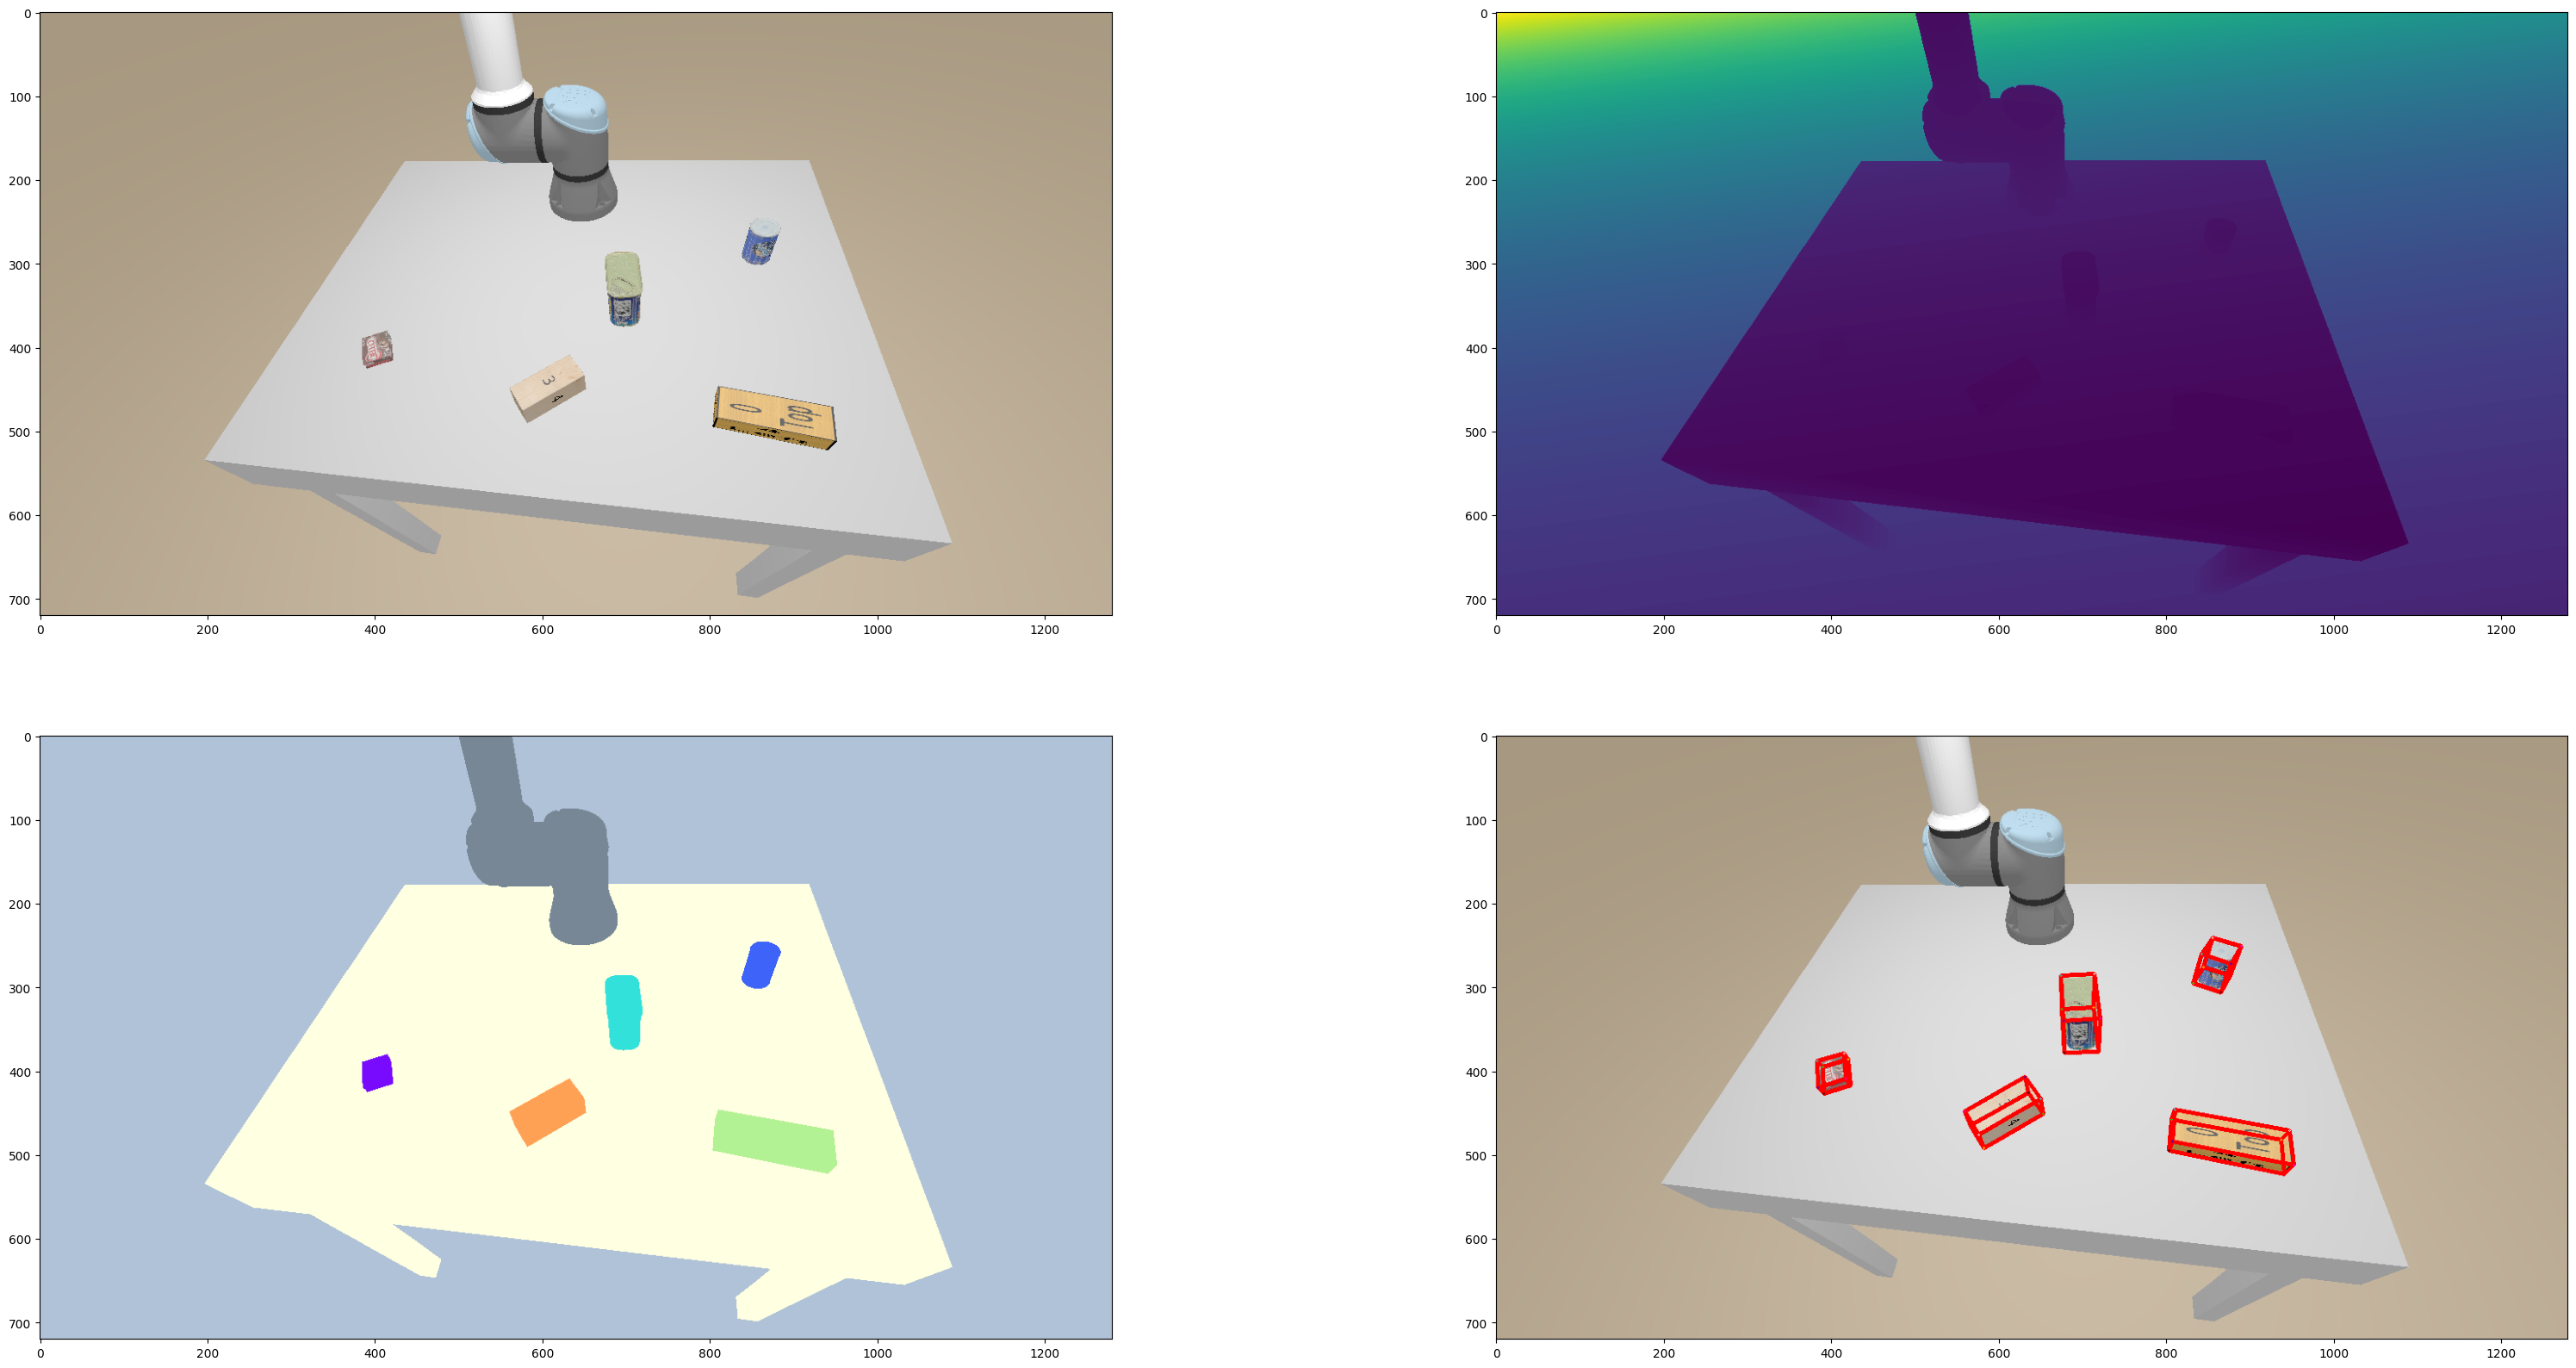

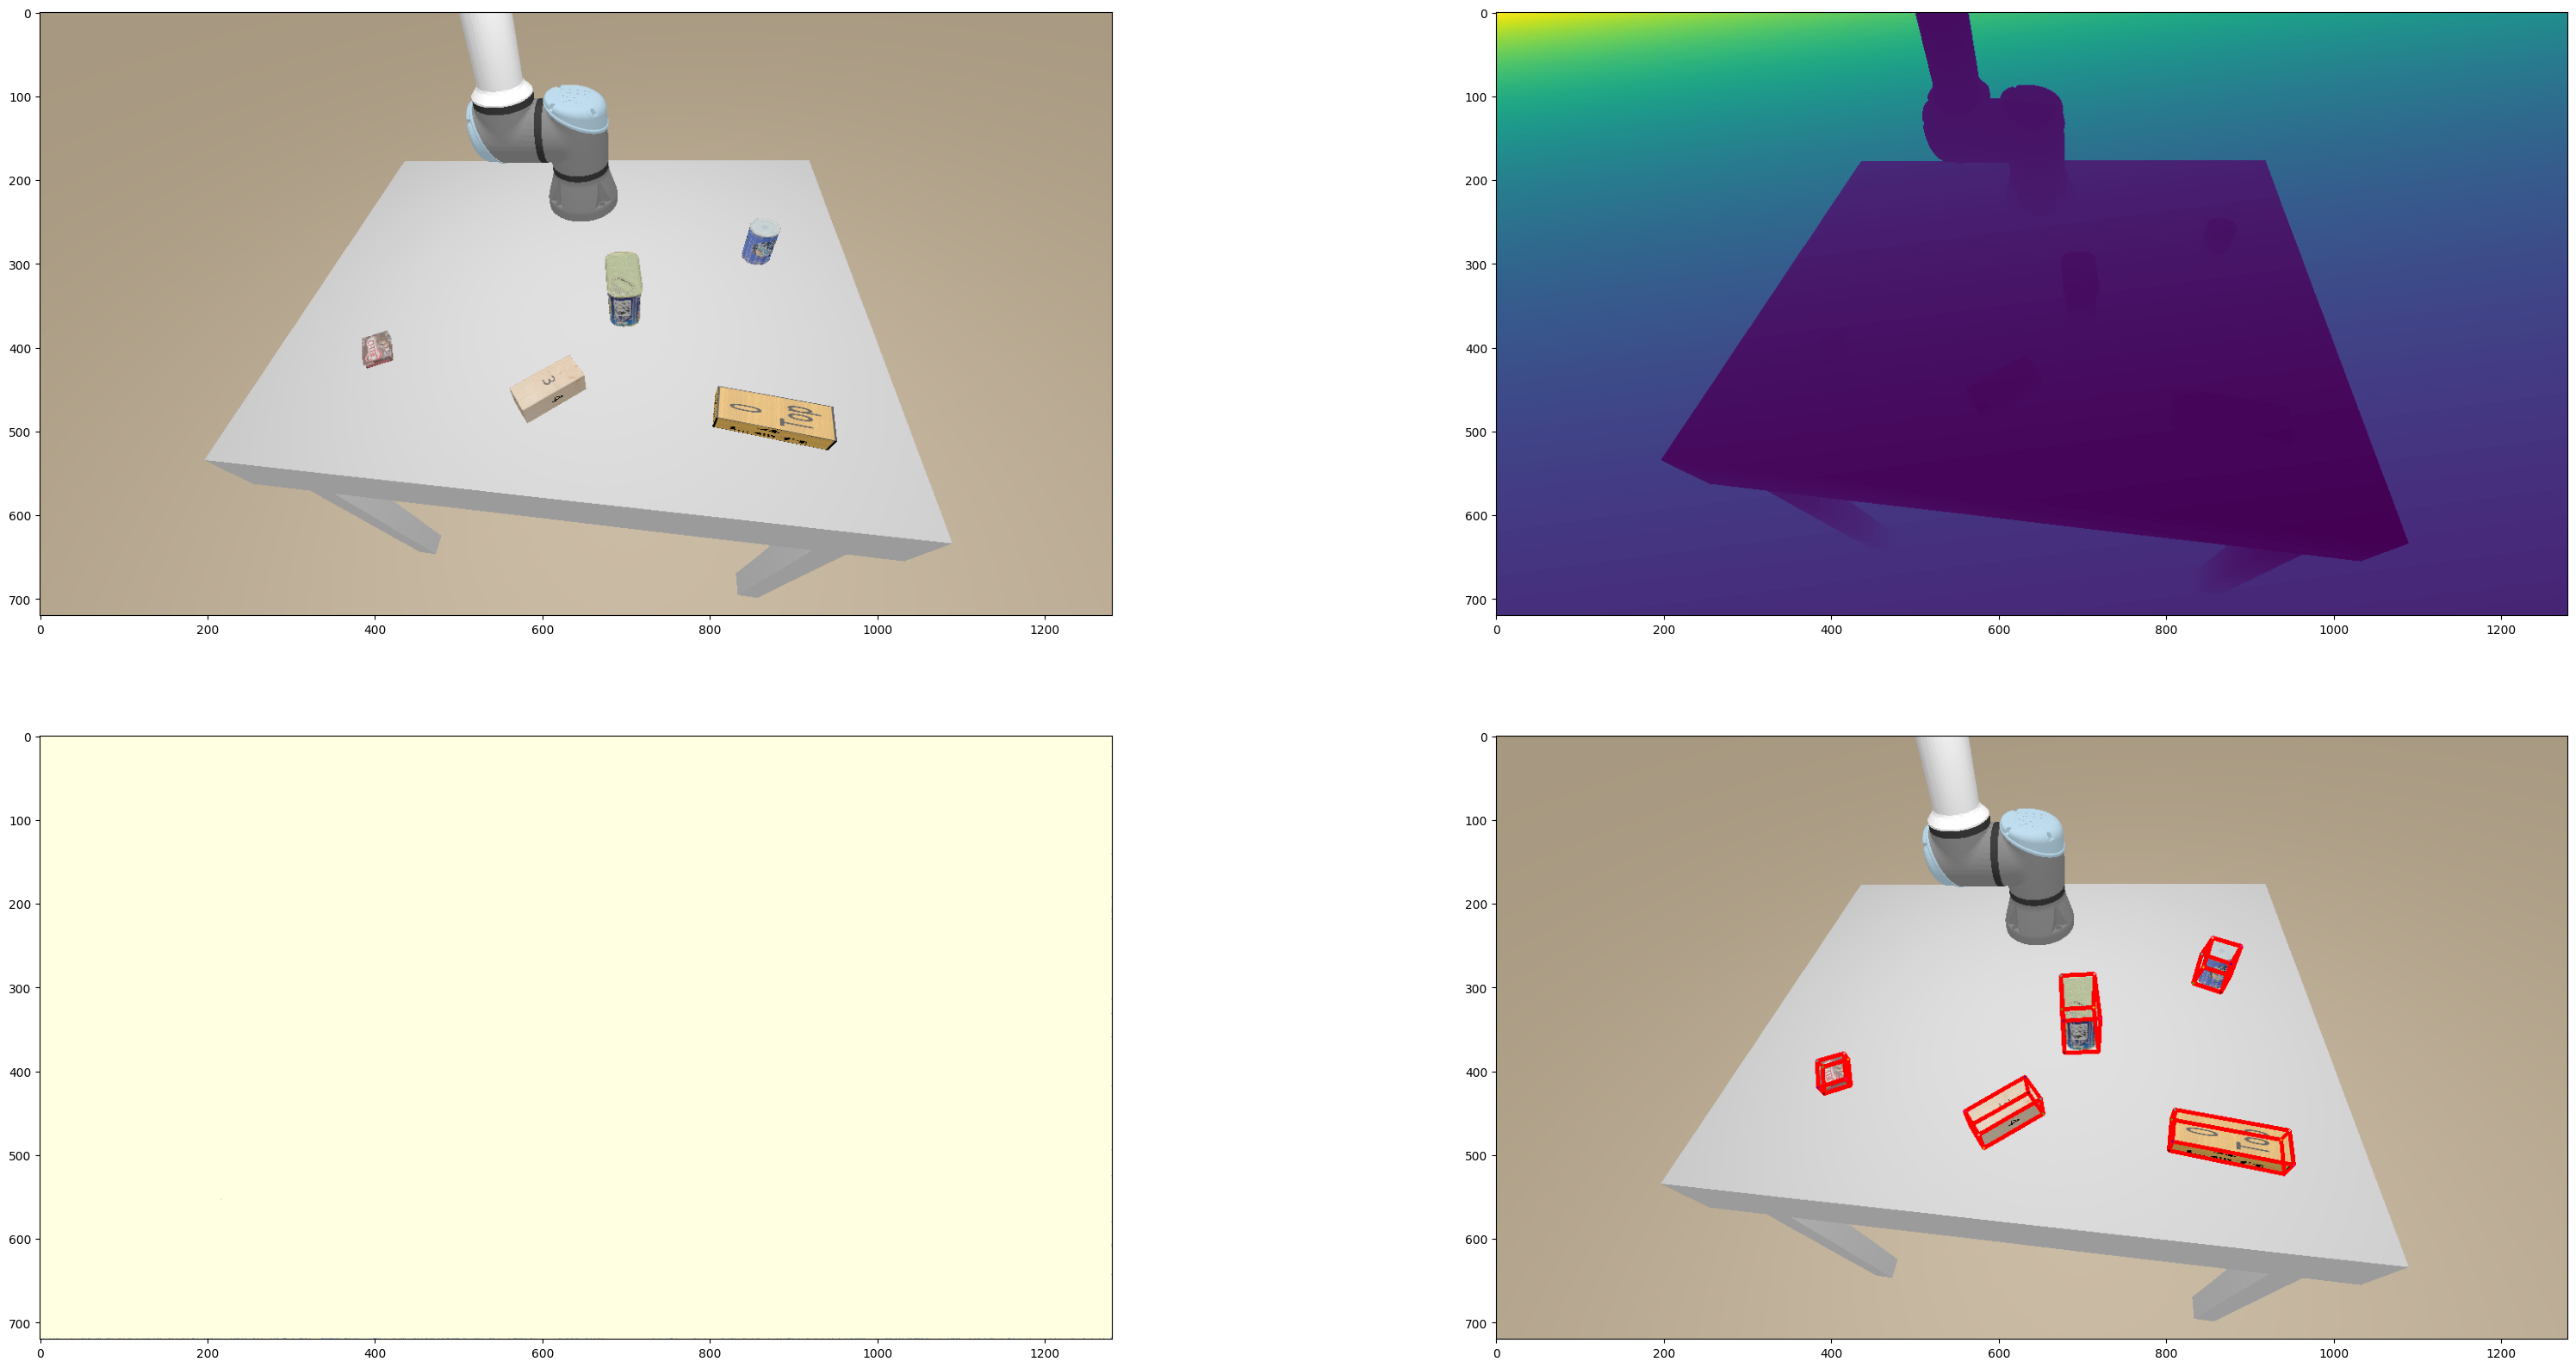

In [2]:
from utils.utils_data import *
from utils.segnet import *
from torchvision.transforms import *
import torch.nn.functional as F


device = torch.device('cpu')
params = {'bz': 1, 'shuffle': True, 'num_workers':1}

input_size, original_size = (512, 512), (720, 1280)
transforms = {
    'rgb'  : Compose([Resize((512,512)), RandomHorizontalFlip(), ColorJitter()]),    # [Pad((0,280))
    'label'  : Compose([Resize((512,512))])
}

post_transforms = {
    'rgb'  : Resize(original_size),
    'depth': Resize(original_size),
    'label': Resize(original_size),
    'pred': Resize(original_size)
}

'''Init net, load weight '''
# checkpoint = 'exp/segnet_weight_INTERRUPTED_05-12:31_.pt'   # TODO: Modify me for each trial
checkpoint = fname
model = SegNet(input_nbr=3, label_nbr=82).to(device=device)
model.load_state_dict(torch.load(checkpoint))

model.eval()

loader = get_loader(SegDataset(split_name='val_tiny', transforms=None, one_hot_label=True), params=params)
deflate = DeflateLabel()


sample = next(iter(loader))
rgb, depth, label, meta, suffix = \
        sample['rgb'], sample['depth'], sample['label'], sample['meta'], sample['suffix']
meta = load_pickle(meta[0])
print(f"Shapes: rgb {rgb.shape}, depth {depth.shape}, label {label.shape}")


rgb = rgb.to(device=device, dtype=torch.float32)
pred = model(rgb)

rgb = post_transforms['rgb'](rgb)
depth = post_transforms['depth'](depth)
label = post_transforms['label'](label)
pred = post_transforms['pred'](pred)


pred = (F.sigmoid(pred) > 0.9).float()
pred = deflate(pred).squeeze()
label = deflate(label).squeeze()

print(f'pred: {pred.shape, torch.min(pred).item(), torch.unique(pred)[::10], torch.max(pred).item()}')
print(f'label: {label.shape, torch.min(label).item(), torch.unique(label)[::10], torch.max(label).item()}')


visualize_one_scene(rgb, depth, label, meta, suffix)     # Predicted segmentation
visualize_one_scene(rgb, depth, pred, meta, suffix)     # Predicted segmentation